# Cadeias de Markov


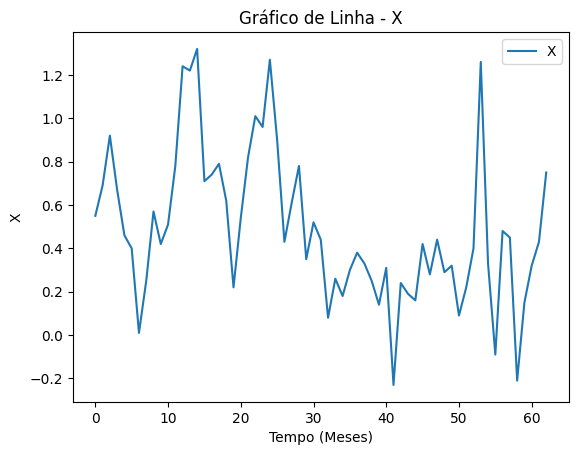

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir os dados em um DataFrame
data = {
    "Tempo": [2014]*12 + [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + [2019]*3,
   # ALTERE VALORES ABAIXO
################################################################################
    "X": [0.55, 0.69, 0.92, 0.67, 0.46, 0.4, 0.01, 0.25, 0.57, 0.42, 0.51, 0.78,
          1.24, 1.22, 1.32, 0.71, 0.74, 0.79, 0.62, 0.22, 0.54, 0.82, 1.01, 0.96,
          1.27, 0.9, 0.43, 0.61, 0.78, 0.35, 0.52, 0.44, 0.08, 0.26, 0.18, 0.3,
          0.38, 0.33, 0.25, 0.14, 0.31, -0.23, 0.24, 0.19, 0.16, 0.42, 0.28, 0.44,
          0.29, 0.32, 0.09, 0.22, 0.4, 1.26, 0.33, -0.09, 0.48, 0.45, -0.21, 0.15,
          0.32, 0.43, 0.75]
}
################################################################################
df = pd.DataFrame(data)

# Plotar o gráfico de linha
plt.plot(df['X'], label='X')
plt.title('Gráfico de Linha - X')
plt.xlabel('Tempo (Meses)')
plt.ylabel('X')
plt.legend()
plt.show()


In [2]:
import numpy as np
# Passo 1: Definir o número de valores
n = len(df)  # Conta o número de linhas

# Passo 2: Calcular o logaritmo de n e arredondar o valor de k
# Regra Sturges
k = 1 + 3.3 * np.log10(n)
k = round(k)
print(f'k (número de classes arredondado)= {k}')

# Passo 3: Calcular o intervalo entre as classes (h)
h = (df['X'].max() - df['X'].min()) / k
print(f'h (intervalo entre as classes)= {h}')

# Passo 4: Definir os intervalos de cada classe
print(  )
min_val = df['X'].min()  # Valor mínimo
max_val = df['X'].max()  # Valor máximo
print(f'min= {min_val}')
print(f'max= {max_val}')
print()

# Passo 5: Criar a tabela de intervalos de classes
intervalos = []
interval_labels = []
inicio = min_val
for i in range(k):
    fim = inicio + h
    intervalos.append(inicio)
    interval_labels.append(f'({inicio:.2f} a {fim:.2f})')
    inicio = fim

# Adicionar o último ponto ao intervalo
intervalos.append(inicio)

# Exibir os intervalos e rótulos gerados
print(f'Intervalos: {intervalos}')
print(f'Rótulos: {interval_labels}')


k (número de classes arredondado)= 7
h (intervalo entre as classes)= 0.22142857142857145

min= -0.23
max= 1.32

Intervalos: [np.float64(-0.23), np.float64(-0.008571428571428563), np.float64(0.21285714285714288), np.float64(0.43428571428571433), np.float64(0.6557142857142858), np.float64(0.8771428571428572), np.float64(1.0985714285714288), np.float64(1.3200000000000003)]
Rótulos: ['(-0.23 a -0.01)', '(-0.01 a 0.21)', '(0.21 a 0.43)', '(0.43 a 0.66)', '(0.66 a 0.88)', '(0.88 a 1.10)', '(1.10 a 1.32)']


In [3]:
# Passo 6: Discretizar os dados no dataframe em intervalos usando os intervalos calculados
df['intervalo'] = pd.cut(df['X'], bins=intervalos, labels=interval_labels, include_lowest=True)

# Passo 7: Criar a matriz de transição
n = len(interval_labels)
matriz_transicao = np.zeros((n, n))

# Contar as transições de estado
for i in range(len(df) - 1):
    estado_atual = df.loc[i, 'intervalo']
    proximo_estado = df.loc[i + 1, 'intervalo']
    if pd.notna(estado_atual) and pd.notna(proximo_estado):
        matriz_transicao[interval_labels.index(estado_atual), interval_labels.index(proximo_estado)] += 1

# Exibir a matriz de transição com os intervalos como rótulos
matriz_transicao_df = pd.DataFrame(matriz_transicao, index=interval_labels, columns=interval_labels)

# Adicionar estilo ao DataFrame para melhor visualização
styled_matriz_transicao_df = matriz_transicao_df.style.format("{:.1f}") \
    .set_caption("Matriz de Transição de Estados") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('text-align', 'center'), ('font-size', '16px')]
    }])

# Exibir o DataFrame estilizado
styled_matriz_transicao_df

,(-0.23 a -0.01),(-0.01 a 0.21),(0.21 a 0.43),(0.43 a 0.66),(0.66 a 0.88),(0.88 a 1.10),(1.10 a 1.32)
(-0.23 a -0.01),0.0,1.0,1.0,1.0,0.0,0.0,0.0
(-0.01 a 0.21),0.0,1.0,7.0,0.0,0.0,0.0,0.0
(0.21 a 0.43),2.0,5.0,7.0,6.0,1.0,0.0,1.0
(0.43 a 0.66),1.0,1.0,4.0,2.0,4.0,0.0,0.0
(0.66 a 0.88),0.0,0.0,1.0,2.0,2.0,2.0,1.0
(0.88 a 1.10),0.0,0.0,1.0,0.0,1.0,1.0,1.0
(1.10 a 1.32),0.0,0.0,1.0,0.0,1.0,1.0,2.0


In [4]:
# Discretizar os dados no DataFrame em intervalos
df['intervalo'] = pd.cut(df['X'], bins=intervalos, labels=interval_labels, include_lowest=True)

# Criar a matriz de transição
n = len(interval_labels)
matriz_transicao = np.zeros((n, n))

# Contar as transições de estado
for i in range(len(df) - 1):
    estado_atual = df.loc[i, 'intervalo']
    proximo_estado = df.loc[i + 1, 'intervalo']
    if pd.notna(estado_atual) and pd.notna(proximo_estado):
        matriz_transicao[interval_labels.index(estado_atual), interval_labels.index(proximo_estado)] += 1

# Exibir a matriz de transição com os intervalos como rótulos
matriz_transicao_df = pd.DataFrame(matriz_transicao, index=interval_labels, columns=interval_labels)

# Calcular a matriz de probabilidade de transição de Markov
matriz_probabilidade = matriz_transicao_df.div(matriz_transicao_df.sum(axis=1), axis=0)

# Estilizar a matriz de probabilidade de transição com valores em percentual
styled_matriz_probabilidade_percentual = matriz_probabilidade.style.format("{:.2%}") \
    .set_caption("Matriz de Probabilidade de Transição de Markov (em %)") \
    .background_gradient(cmap='Greens') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('text-align', 'center'), ('font-size', '16px')]
    }])

# Exibir o DataFrame estilizado com valores em percentual
styled_matriz_probabilidade_percentual

,(-0.23 a -0.01),(-0.01 a 0.21),(0.21 a 0.43),(0.43 a 0.66),(0.66 a 0.88),(0.88 a 1.10),(1.10 a 1.32)
(-0.23 a -0.01),0.00%,33.33%,33.33%,33.33%,0.00%,0.00%,0.00%
(-0.01 a 0.21),0.00%,12.50%,87.50%,0.00%,0.00%,0.00%,0.00%
(0.21 a 0.43),9.09%,22.73%,31.82%,27.27%,4.55%,0.00%,4.55%
(0.43 a 0.66),8.33%,8.33%,33.33%,16.67%,33.33%,0.00%,0.00%
(0.66 a 0.88),0.00%,0.00%,12.50%,25.00%,25.00%,25.00%,12.50%
(0.88 a 1.10),0.00%,0.00%,25.00%,0.00%,25.00%,25.00%,25.00%
(1.10 a 1.32),0.00%,0.00%,20.00%,0.00%,20.00%,20.00%,40.00%


In [5]:
# Número de estados (baseado na matriz de transição de probabilidade já calculada)
n = matriz_probabilidade.shape[0]

# Resolver o sistema linear para encontrar o vetor de probabilidades estacionárias
# Queremos resolver pi * P = pi e sum(pi) = 1
A = np.transpose(matriz_probabilidade) - np.eye(n)
A = np.vstack([A, np.ones(n)])
b = np.zeros(n + 1)
b[-1] = 1

# Resolver o sistema de equações
estado_estavel = np.linalg.lstsq(A, b, rcond=None)[0]

# Usar os intervalos e rótulos calculados dinamicamente
# A mesma lógica usada anteriormente para gerar 'intervalos' e 'interval_labels'
interval_labels = [f'({intervalos[i]:.2f} a {intervalos[i+1]:.2f})' for i in range(len(intervalos)-1)]

# Exibir as probabilidades de estado estacionário em percentual com os novos rótulos
df_estado_estavel = pd.DataFrame({
    'Intervalo': interval_labels,
    'Probabilidade de estado (%)': estado_estavel * 100
})

# Exibir o resultado
print(df_estado_estavel)


         Intervalo  Probabilidade de estado (%)
0  (-0.23 a -0.01)                     4.627229
1   (-0.01 a 0.21)                    12.466399
2    (0.21 a 0.43)                    34.748710
3    (0.43 a 0.66)                    17.619064
4    (0.66 a 0.88)                    14.652892
5    (0.88 a 1.10)                     7.200383
6    (1.10 a 1.32)                     8.685324


In [6]:
# Cálculo do tempo de recorrência esperado (1 / probabilidade de estado estável)
tempo_recorrencia = 1 / estado_estavel

# Criar um DataFrame com as probabilidades de estado e os tempos de recorrência
df_tempo_recorrencia = pd.DataFrame({
    'Intervalo': interval_labels,
    'Probabilidade de estado (%)': estado_estavel * 100,
    'Tempo de recorrência esperado (meses)': tempo_recorrencia
})

# Exibir a tabela organizada
print(df_tempo_recorrencia)

         Intervalo  Probabilidade de estado (%)  \
0  (-0.23 a -0.01)                     4.627229   
1   (-0.01 a 0.21)                    12.466399   
2    (0.21 a 0.43)                    34.748710   
3    (0.43 a 0.66)                    17.619064   
4    (0.66 a 0.88)                    14.652892   
5    (0.88 a 1.10)                     7.200383   
6    (1.10 a 1.32)                     8.685324   

   Tempo de recorrência esperado (meses)  
0                              21.611207  
1                               8.021563  
2                               2.877805  
3                               5.675670  
4                               6.824592  
5                              13.888149  
6                              11.513676  


In [7]:
# Estilizar a tabela com formatação de percentuais e tempo de recorrência em meses
styled_df_tempo_recorrencia = df_tempo_recorrencia.style.format({
    'Probabilidade de estado (%)': "{:.2f}%",
    'Tempo de recorrência esperado (meses)': "{:.2f}"
}) \
    .set_caption("Tabela de Probabilidade de Estado Estável e Tempo de Recorrência Esperado") \
    .background_gradient(subset=['Probabilidade de estado (%)'], cmap='Blues') \
    .background_gradient(subset=['Tempo de recorrência esperado (meses)'], cmap='Greens') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('text-align', 'center'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Exibir a tabela formatada
styled_df_tempo_recorrencia

,Intervalo,Probabilidade de estado (%),Tempo de recorrência esperado (meses)
0,(-0.23 a -0.01),4.63%,21.61
1,(-0.01 a 0.21),12.47%,8.02
2,(0.21 a 0.43),34.75%,2.88
3,(0.43 a 0.66),17.62%,5.68
4,(0.66 a 0.88),14.65%,6.82
5,(0.88 a 1.10),7.20%,13.89
6,(1.10 a 1.32),8.69%,11.51


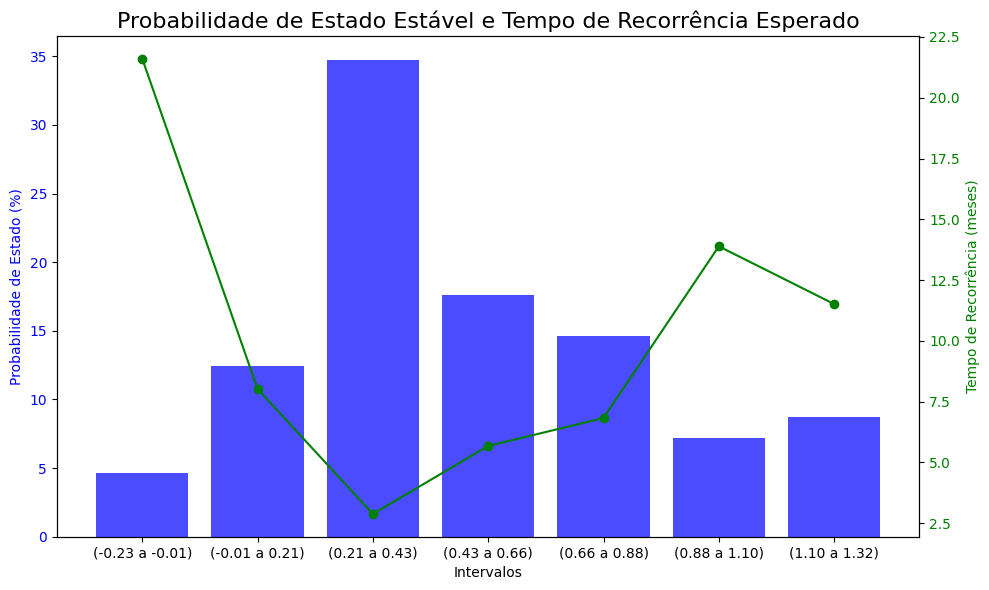

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a probabilidade de estado estável
ax1.bar(interval_labels, estado_estavel * 100, color='b', alpha=0.7, label="Probabilidade de Estado (%)")
ax1.set_ylabel('Probabilidade de Estado (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlabel("Intervalos")

# Criar um segundo eixo y para o tempo de recorrência esperado
ax2 = ax1.twinx()
ax2.plot(interval_labels, tempo_recorrencia, color='g', marker='o', label="Tempo de Recorrência (meses)")
ax2.set_ylabel('Tempo de Recorrência (meses)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Título e exibição do gráfico
plt.title("Probabilidade de Estado Estável e Tempo de Recorrência Esperado", fontsize=16)
fig.tight_layout()
plt.show()